# Final Project

 **Reasoning and Agentic AI** – This Notebook looks at implimentation of AI methods that enhance reasoning and decision-making through a pipeline of

 , including reinforcement learning (RL), chain-of-thought prompting, self-reflection mechanisms, and agentic AI models that autonomously plan, learn, and execute tasks with minimal human intervention.

# Installation and setup of Ollama in the Colab environment.

In [ ]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [73.0 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,697 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,24

## Enable asyncronous running of the Ollama software

In [ ]:
import threading
import subprocess
import time

def run_ollama_serve():
  subprocess.Popen(["ollama", "serve"])

thread = threading.Thread(target=run_ollama_serve)
thread.start()
time.sleep(5)

## Pull the Model from the Ollama server

## Here we are going to download the Googles gemma2 - 2 billion parameter model. This model is ~1.6 GB. You could pull any other smaller model like the llama 3.2 billion parameter model using `!ollama pull llama:3.2`. This model is ~2 GB.  

In [ ]:
!ollama pull gemma2:2b

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠹ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠴ pulling manifest ⠦ pulling manifest 
pulling 7462734796d6...   0% ▕▏    0 B/1.6 GB                  pulling manifest 
pulling 7462734796d6...   0% ▕▏    0 B/1.6 GB                  pulling manifest 
pulling 7462734796d6...   0% ▕▏    0 B/1.6 GB                  pulling manifest 
pulling 7462734796d6...   0% ▕▏    0 B/1.6 GB                  pulling manifest 
pulling 7462734796d6...   0% ▕▏ 2.4 MB/1.6 GB                  pulling manifest 
pulling 7462734796d6...   1% ▕▏  23 MB/1.6 GB                  p

## Ensure the install happened

The command below ensures that the Ollama software is running and that the model has been installed as it lists all of the installed models on this virtual desktop.  The output should look like the below. If you choose to use a different model you will need to update the variable `model_name` in the function `chat(prompt)` below with the `NAME` shown after running `!ollama list`.


|NAME|ID|SIZE| MODIFIED|
|:----------:|:-------------------:|:------------:|:--------------:|
|gemma2:2b|8ccf136fdd52|1.6 GB| About a minute ago|  

In [ ]:
!ollama list

NAME         ID              SIZE      MODIFIED      
gemma2:2b    8ccf136fdd52    1.6 GB    3 seconds ago    


# Installation of the Python packages

In [ ]:
!pip install ollama
!pip install neo4j
!pip install pandas
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 22.1 MB/s eta 0:00:00


# Importing the libraries and modules needed

In [ ]:
import ollama
from neo4j import GraphDatabase
from neo4j.exceptions import Neo4jError
import pandas as pd
import json

# Mount your google drive to gain access to your uploaded Movie.xlsx file.

Here you can mount your google drive for persistant storage of the `Movie.xlsx` file.  

Alternatively, you can use runtime storage by clicking on the folder on the left sidebar (red arrow) and then clicking the upload button (highlighted yellow),

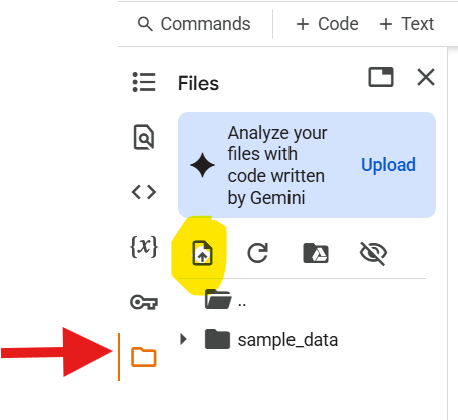

Either way you will need to copy the path of that file to bring in the data needed for the pipeline.  That step is shown in the figure below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Connect to the Neo4J database

Below are the Three key pieces of information that are needed and provide by Chris.


1.   URI for the web access to the database
2.   user name for the database
3.   password for the database

The database is currently running, however I am only allowed to maintain it for 3 days. If I have to relaunch the database these three items will change and I will provide them using discord.



In [ ]:
# from Neo_with_error_handles import Movie_database_query
################# Neo4J related for sandbox database  #######################
# Local URI (bolt) and credentials
URI = "bolt://98.80.139.160"
user = "neo4j"
# the password line below is for the sandbox Neo4J database, e.g. movie database
password = "strand-channel-origin"
AUTH = ("neo4j", "strand-channel-origin")

# Read in the data for executing the pipeline I have created.  

Depending on where you have loaded the `Movie.xlsx` file, you will need to modify the `excel_file_path_name` variable.  The image below depicts the pop up (by clicking the  `⋮`  to the right of the file name) where you can copy the path to the file. Note that the `⋮` are hidden in the picture by the pop up menu.  Note, Here I have uploaded the `Movie.xlsx` file to the runtime storage and have not mounted my google drive.  This storage is temperary and will be deleted when you disconnect and delete runtime.  

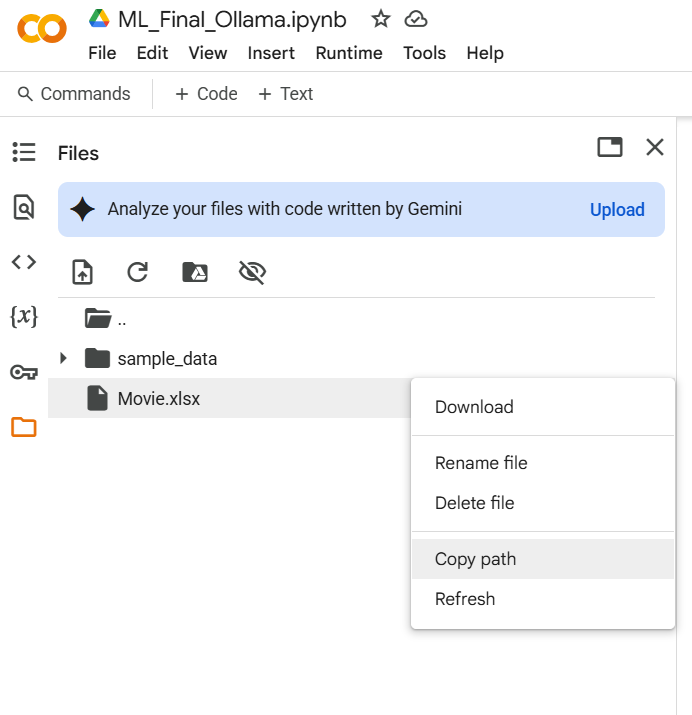

In [ ]:
################## Excel related  #######################
worksheet_name = 'Movie' # Movie
excel_file_path_name = "/content/"
Queries_from_excel = pd.read_excel(excel_file_path_name + 'Movie.xlsx', sheet_name=worksheet_name) #reads in as DataFrame

# Initialize the lists for storing data

Here we initialize the lists that track:
1.  The prompts to Task 1 LLM
2.  The responses from the Task 1 LLM
3.  "Cypher code" sent to the Neo4J database
4.  The response from the Neo4J database
5.  The response back from the Task 2 LLM

In [ ]:
Query_number = 0
number_of_queries = len(Queries_from_excel)
list_of_prompts = []
list_of_responses_from_LLM = []
list_of_send_to_neo = []
list_of_responses_from_database = [] # Neo4J DB
list_of_responses_back_from_second_LLM = []

# Multi-agent Pipeline Defined

Below is the multi-agent pipeline.

Recall Task 1 is to take natural language from the user and generate a cypher query for the tool call to the Neo4J database.

The call is made using:
```python
response_chat = ollama.chat(model=model_1, format="json", messages=[
        {
            'role': 'user',
            'content': prompt,
        },
    ],
    options={
        'temperature': temperature
    })
```

The Database call is done using:

```python
with GraphDatabase.driver(URI, auth=AUTH) as driver:
            results, summary, keys = driver.execute_query(send_to_neo_dict["Cypher output"])
            My_data_base_output = str(results)
```

Here we only need the `results` response from the database.  Note that using the `with` to instantiate the driver will handle properly closing the driver after the query.

The original question to the database and the response from the database are then sent to Task 2 for converstion back to natural language for the user.  This is done using the following:

```python
response_back = ollama.chat(model=model_2, messages=[
        {
            'role': 'user',
            'content': prompt_back,
        },
    ],
    options={
        'temperature': temperature
    })
```

In [ ]:
def chat(prompt):
    send_to_neo_dict = {} #needed to declare
    model_name = "gemma2:2b"
    ################# TASK 1 CALL TO THE FIRST LLM ###################

    response_chat = ollama.chat(model=model_name, format="json", messages=[
        {
            'role': 'user',
            'content': prompt,
        },
    ],
    options={
        'temperature': temperature
    })

    print(response_chat['message']['content'], end='', flush=True)
    list_of_prompts.append(prompt) #for excel column data
    list_of_responses_from_LLM.append(response_chat['message']['content']) #for excel column data
    send_to_neo = response_chat['message']['content']

    try:
        send_to_neo_dict = json.loads(send_to_neo)
    except:
        list_of_send_to_neo.append('error with json to dictionary conversion')
        My_data_base_output = 'error with json to dictionary conversion'
        send_to_neo_dict["Cypher output"] = 'error with json to dictionary conversion'

    try:
        # initialize My_data_base_output as empty string
        My_data_base_output = ''

        ################# NEO4J DATABASE CALL ###################

        with GraphDatabase.driver(URI, auth=AUTH) as driver:
            results, summary, keys = driver.execute_query(send_to_neo_dict["Cypher output"])
            My_data_base_output = str(results)
        list_of_send_to_neo.append(send_to_neo_dict["Cypher output"])
    except Neo4jError as e:
        list_of_send_to_neo.append('Error with Neo4J query')
        My_data_base_output = 'Error with Neo4J query'

    list_of_responses_from_database.append(str(My_data_base_output))
    prompt_back = f'Please summarize the following back to the user: your question {user_question} with a result of {str(My_data_base_output)}'

    ################# TASK 2 CALL TO THE SECOND LLM ###################

    response_back = ollama.chat(model=model_name, messages=[
        {
            'role': 'user',
            'content': prompt_back,
        },
    ],
                                options={
                                    'temperature': temperature
                                })
    list_of_responses_back_from_second_LLM.append(response_back['message']['content'])

# Iteration through the questions loaded from the experimental file `Movie.xlsx`.

Here we iterate through the `Queries_from_excel` dataframe.  The prompt is build from the columns:

1. Context
2. Question
3. Node_labels
4. Node_properties
5. Relationships

In this data only `2. Question` is changing for each row.  The pipeline is executed for each row of the dataframe and the results are appended to the tracking lists.  Recall the `chat(prompt)` is what executes the pipeline method defined above.

In [ ]:
for row in Queries_from_excel.itertuples():
    Query_number += 1
    print(f'Query {Query_number} of {number_of_queries} being executed.\n')
    prompt = row.Context + '\n' + row.Question + '\n' + row.Node_labels + '\n' + row.Node_properties + '\n' + row.Relationships
    user_question = row.Question
    temperature = row.Temperature
    chat(prompt)


Query 2 of 10 being executed.

{
  "step1": "To answer who the actors are in 'The Matrix', I need to identify the 'Acted_IN' relationships between the 'Person' node and the 'Movie' node.",
  "step2": "I will use the 'Acted_IN' relationship to find the actors involved in the movie 'The Matrix'.", 
  "Cypher output": "MATCH (m:Movie {title: 'The Matrix'})-[a:ACTED_IN]->(p:Person) RETURN p.name" 
} 


Query 3 of 10 being executed.

{
  "step1": "To identify the actors in 'Top Gun', I need to find the 'Person' nodes that were involved in the movie.",
  "step2": "The relationship between 'Person' and 'Movie' is 'Acted_IN'. This means we need to look for connections where a person acted in the movie.",
  "step3": "I will use Cypher query to find all actors who starred in 'Top Gun'.",
  "Cypher output": "MATCH (p:Person)-[:ACTED_IN]->(m:Movie) WHERE m.title = 'Top Gun' RETURN p.name" 
} 


Query 4 of 10 being executed.

{
  "step1": "To answer when 'The Matrix' was made, I need to find the mo

# Preparing data for saving

Here we write our lists of generated data from the pipeline to the dataframe and the following code block saves it as an excel file `Movie_Output.xlsx`.  If you are running this with the `Movie.xlsx` in the runtime storage, as I depicted above with the figure, you need to click on the `⋮` and download the output file. This file can be opened with google sheets if you don't have Excel.

In [ ]:

Queries_from_excel['Prompt to LLM'] = list_of_prompts
Queries_from_excel['LLM output'] = list_of_responses_from_LLM
Queries_from_excel['Sent to Neo'] = list_of_send_to_neo
Queries_from_excel['Database output'] = list_of_responses_from_database
Queries_from_excel['Database summary back from LLM'] = list_of_responses_back_from_second_LLM


In [ ]:
Queries_from_excel.to_excel(excel_file_path_name + 'Movie_Output.xlsx', sheet_name=worksheet_name, index=False)

In [ ]:
Queries_from_excel.head()

,Node_labels,Node_properties,Relationships,Context,Question,Temperature,Question number,Order,Prompt to LLM,LLM output,Sent to Neo,Database output,Database summary back from LLM
0,In this database there are nodes with the foll...,"The ""Movie"" node has the following property ke...",The following are the relationships that exist...,Context: You are an AI agent that is an expert...,"Who are the actors in the movie ""The Matrix""?",0,1,1,Context: You are an AI agent that is an expert...,"{\n ""step1"": ""To answer who the actors are in...",MATCH (m:Movie {title: 'The Matrix'})-[a:ACTED...,[],"Here are the main actors from the movie ""The M..."
1,In this database there are nodes with the foll...,"The ""Movie"" node has the following property ke...",The following are the relationships that exist...,Context: You are an AI agent that is an expert...,"Who are the actors in the movie ""Top Gun""?",0,2,2,Context: You are an AI agent that is an expert...,"{\n ""step1"": ""To identify the actors in 'Top ...",MATCH (p:Person)-[:ACTED_IN]->(m:Movie) WHERE ...,"[<Record p.name='Val Kilmer'>, <Record p.name=...","The main actors in the movie ""Top Gun"" are:\n\..."
2,In this database there are nodes with the foll...,"The ""Movie"" node has the following property ke...",The following are the relationships that exist...,Context: You are an AI agent that is an expert...,"When was the movie ""The Matrix"" made?",0,3,3,Context: You are an AI agent that is an expert...,"{\n ""step1"": ""To answer when 'The Matrix' was...",MATCH (m:Movie {title: 'The Matrix'}) RETURN m...,[<Record m.released=1999>],"""The Matrix"" was released in **1999**. \n"
3,In this database there are nodes with the foll...,"The ""Movie"" node has the following property ke...",The following are the relationships that exist...,Context: You are an AI agent that is an expert...,"When was the movie ""The Matrix"" released?",0,4,4,Context: You are an AI agent that is an expert...,"{\n ""step1"": ""To answer when 'The Matrix' was...",MATCH (m:Movie {title: 'The Matrix'}) RETURN m...,[<Record m.released=1999>],"""The Matrix"" was released in **1999**. \n"
4,In this database there are nodes with the foll...,"The ""Movie"" node has the following property ke...",The following are the relationships that exist...,Context: You are an AI agent that is an expert...,"When was the movie ""Top Gun"" made?",0,5,5,Context: You are an AI agent that is an expert...,"{\n ""step1"": ""To answer when 'Top Gun' was ma...",MATCH (m:Movie {title: 'Top Gun'}) RETURN m.re...,[<Record m.released=1986>],"The movie ""Top Gun"" was released in **1986**. \n"


# Outputs from stages in the pipeline

Below you can change the `question_number` to look at the data for that row index at each step in the pipeline.

In [ ]:
question_number = 3

## Prompt to the LLM for Task 1

Mimics Chain-of-thought and gives a single-shot example of the direction of the relationship at the very end.

In [ ]:
print(Queries_from_excel['Prompt to LLM'][question_number])

Context: You are an AI agent that is an expert with Cypher query language and relational databases that thinks before answering.
Example:
{
  "step1": "To solve this problem, i need to identify the correct nodes and labels...",
  "step2": "Based on results from step1, i need to identify the name of the relationship between nodes...",
  ...
  "stepn": "We can get final result by outputing the correct connections between nodes based on the question...",
  "Cypher output": Cypher query
}
Your question is:  
When was the movie "The Matrix" released? 
In this database there are nodes with the following labels: "Movie" and "Person". 
The "Movie" node has the following property keys: "released", "tagline" and "title". The "Person" node has the  following property keys: "born" and "name". 
The following are the relationships that exist between the nodes: "Acted_IN", "Directed", "Follows", "Produced", "Reviewed", "Wrote".  Here is an example of a relationship between the two nodes: (p:Person)-[

## Output from Task 1 of first LLM query

Below we print the output from Task 1 of the first LLM.

Here we can see the Chain-of-thought is in a JSON format, where the cypher query has a key of `Cypher output`.  We use this format to extract the cypher query to sent to the Neo4J database.

In [ ]:
print(Queries_from_excel['LLM output'][question_number])

{
  "step1": "To answer when 'The Matrix' was released, I need to find the movie node in the database.",
  "step2": "I can use the relationship between 'Movie' and 'Acted_IN' to identify the movie node based on the actors involved.", 
  "step3": "I will then use the 'released' property of the 'Movie' node to find the release date.",
  "Cypher output": "MATCH (m:Movie {title: 'The Matrix'}) RETURN m.released"
} 





## What is sent to the the Neo4J database

Below we print the text of what is being sent to the Neo4J database.

In [ ]:
print(Queries_from_excel['Sent to Neo'][question_number])

MATCH (m:Movie {title: 'The Matrix'}) RETURN m.released


## The response from the database

Below we print the response from the database.  There can be three possible responses:

1. data back from the cypher query
  * Happens when syntax is correct and the data exist in the database
2. no data back from the cypher query
  * Happens when syntax is correct and the data <mark>does not</mark> exist in the database
3. error back from the cypher query
  * Happens when the syntax is incorrect

In [ ]:
print(Queries_from_excel['Database output'][question_number])

[<Record m.released=1999>]


## Task 2 Prompt to LLM

Here we print what is sent to the second LLM to generate a natural language response back to the user.

In [ ]:
print(f'Please summarize the following back to the user: your question {Queries_from_excel["Question"][question_number]} with a result of {Queries_from_excel["Database output"][question_number]}')

Please summarize the following back to the user: your question When was the movie "The Matrix" released?  with a result of [<Record m.released=1999>]


## Task 2 Output

Here we print the output from the second LLM from task 2:

In [ ]:
print(Queries_from_excel['Database summary back from LLM'][question_number])

"The Matrix" was released in **1999**. 



Unmounting Drive

<mark> Use this if you have mounted your google drive</mark>

The below code will unmount and flush the memory if you have mounted your google drive to run the `Movie.xlsx` file.

In [ ]:
drive.flush_and_unmount()